# 12 - Integrating OpenQAOA and Azure quantum

In this notebook we showcase the OpenQAOA workflows. The notebook is divided into three parts:

* The default QAOA workflow on the ionq.simulator
* An advanced QAOA workflow on the rigetti QVM
* An RQAOA workflow on the rigetti QVM

## Default QAOA on the IonQ Emulator

In [27]:
from openqaoa.devices import create_device
device_azure = create_device(location='azure',
                             name='ionq.simulator',
                             resource_id="/subscriptions/****/resourceGroups/****/providers/****/Workspaces/****",
                             az_location='westus')

Let's generate a sample problem, and solve it using an OpenQAOA workflow

In [28]:
from openqaoa.problems.problem import NumberPartition

np_integer = NumberPartition([1,2,3])
np_qubo = np_integer.get_qubo_problem()

In [29]:
# The qubo is a dictionary including terms and weigths
np_qubo.asdict()

{'terms': [[0, 1], [0, 2], [1, 2]],
 'weights': [4.0, 6.0, 12.0],
 'constant': 14,
 '_n': 3}

In [30]:
from openqaoa.workflows.optimizer import QAOA

q = QAOA()
q.set_device(device_azure)
q.set_backend_properties(n_shots=1000)
q.set_classical_optimizer(maxiter=5)

In [31]:
q.compile(np_qubo)

In [32]:
q.optimize()

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


......

In [33]:
q.results.optimized

{'optimized angles': [1.35, 0.35],
 'optimized cost': 9.388,
 'optimized measurement outcomes': {'000': 99,
  '100': 24,
  '010': 291,
  '110': 97,
  '001': 102,
  '101': 288,
  '011': 22,
  '111': 77},
 'optimized run job id': '5438db10-79cb-11ed-8e28-fb7973b48fb8'}

## A more advanced QAOA workflow on the Rigetti QVM

In [17]:
device_azure_qvm = create_device(location='azure',
                                name='rigetti.sim.qvm',
                                resource_id="/subscriptions/****/resourceGroups/****/providers/****/Workspaces/****",
                                az_location='westus')

In [18]:
from openqaoa.workflows.optimizer import QAOA

q_custom = QAOA()
q_custom.set_circuit_properties(p=2, param_type='extended', init_type='ramp', mixer_hamiltonian='xy')
q_custom.set_device(device_azure_qvm)
q_custom.set_backend_properties(init_hadamard=True, n_shots=5000, cvar_alpha=0.8)
q_custom.set_classical_optimizer(maxiter=5)

In [19]:
q_custom.compile(np_qubo)

In [20]:
q_custom.optimize()

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

states kept: 8


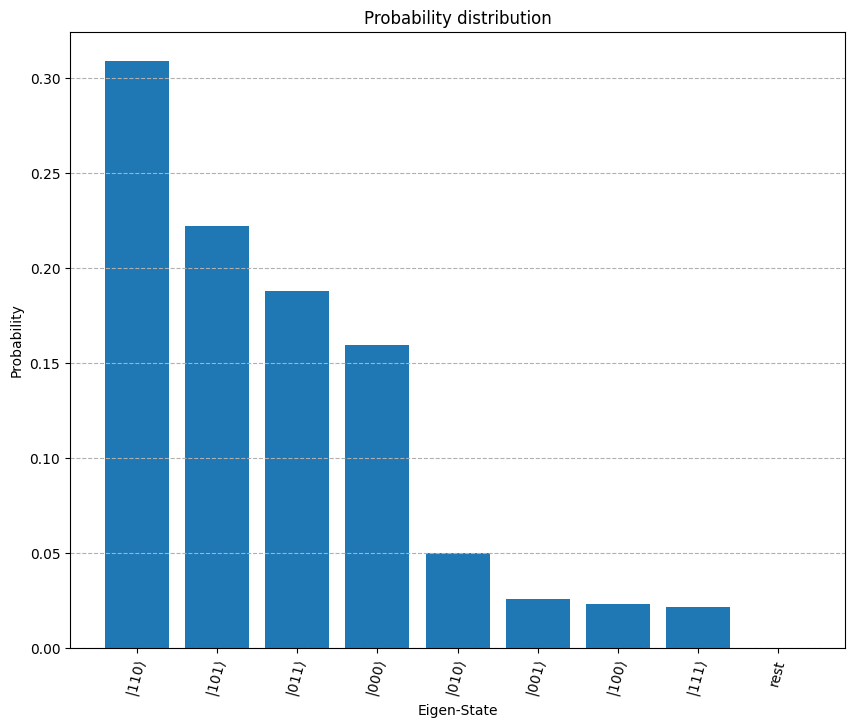

In [21]:
q_custom.results.plot_probabilities()

## RQAOA on a QVM

In [22]:
np_integer = NumberPartition([1,2,3,4,5,15])
np_qubo = np_integer.get_qubo_problem()

In [23]:
from openqaoa.workflows.optimizer import RQAOA

q_rqaoa = QAOA()
q_rqaoa.set_device(device_azure_qvm)

r = RQAOA(qaoa=q_rqaoa, rqaoa_type='custom')

# Set parameters for RQAOA, in this case we fix the steps to 1 (default), the final cutoff value to 3
r.set_rqaoa_parameters(steps = 1, n_cutoff = 3)


In [24]:
r.compile(np_qubo)

In [25]:
r.optimize()

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


............

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

In [26]:
r.result

{'solution': {'111010': 64.0, '000101': 64.0},
 'classical output': {'minimum energy': -38.0,
  'optimal states': ['110', '001']},
 'elimination rules': [{(3, 4): -1.0}, {(2, 4): -1.0}, {(1, 2): 1.0}],
 'schedule': [1, 1, 1],
 'total steps': 3}